### Let's make some plots to see the distribution of the variables and the outliers

In [3]:
# Importing libraries for:
# Data processing
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Plots
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (25,16) 


In [4]:
# Loading a dataframe
df = pd.read_csv('data/train.csv')
df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus


In [5]:
# Let's check the dtypes
df.dtypes

order_id            int64
local_time         object
country_code       object
store_address       int64
payment_status     object
n_of_products       int64
products_total    float64
final_status       object
dtype: object

In [ ]:
# Changing 2 dtypes to categorical

In [6]:
df['order_id'] = df['order_id'].astype('category')

In [7]:
df['store_address'] = df['store_address'].astype('category')

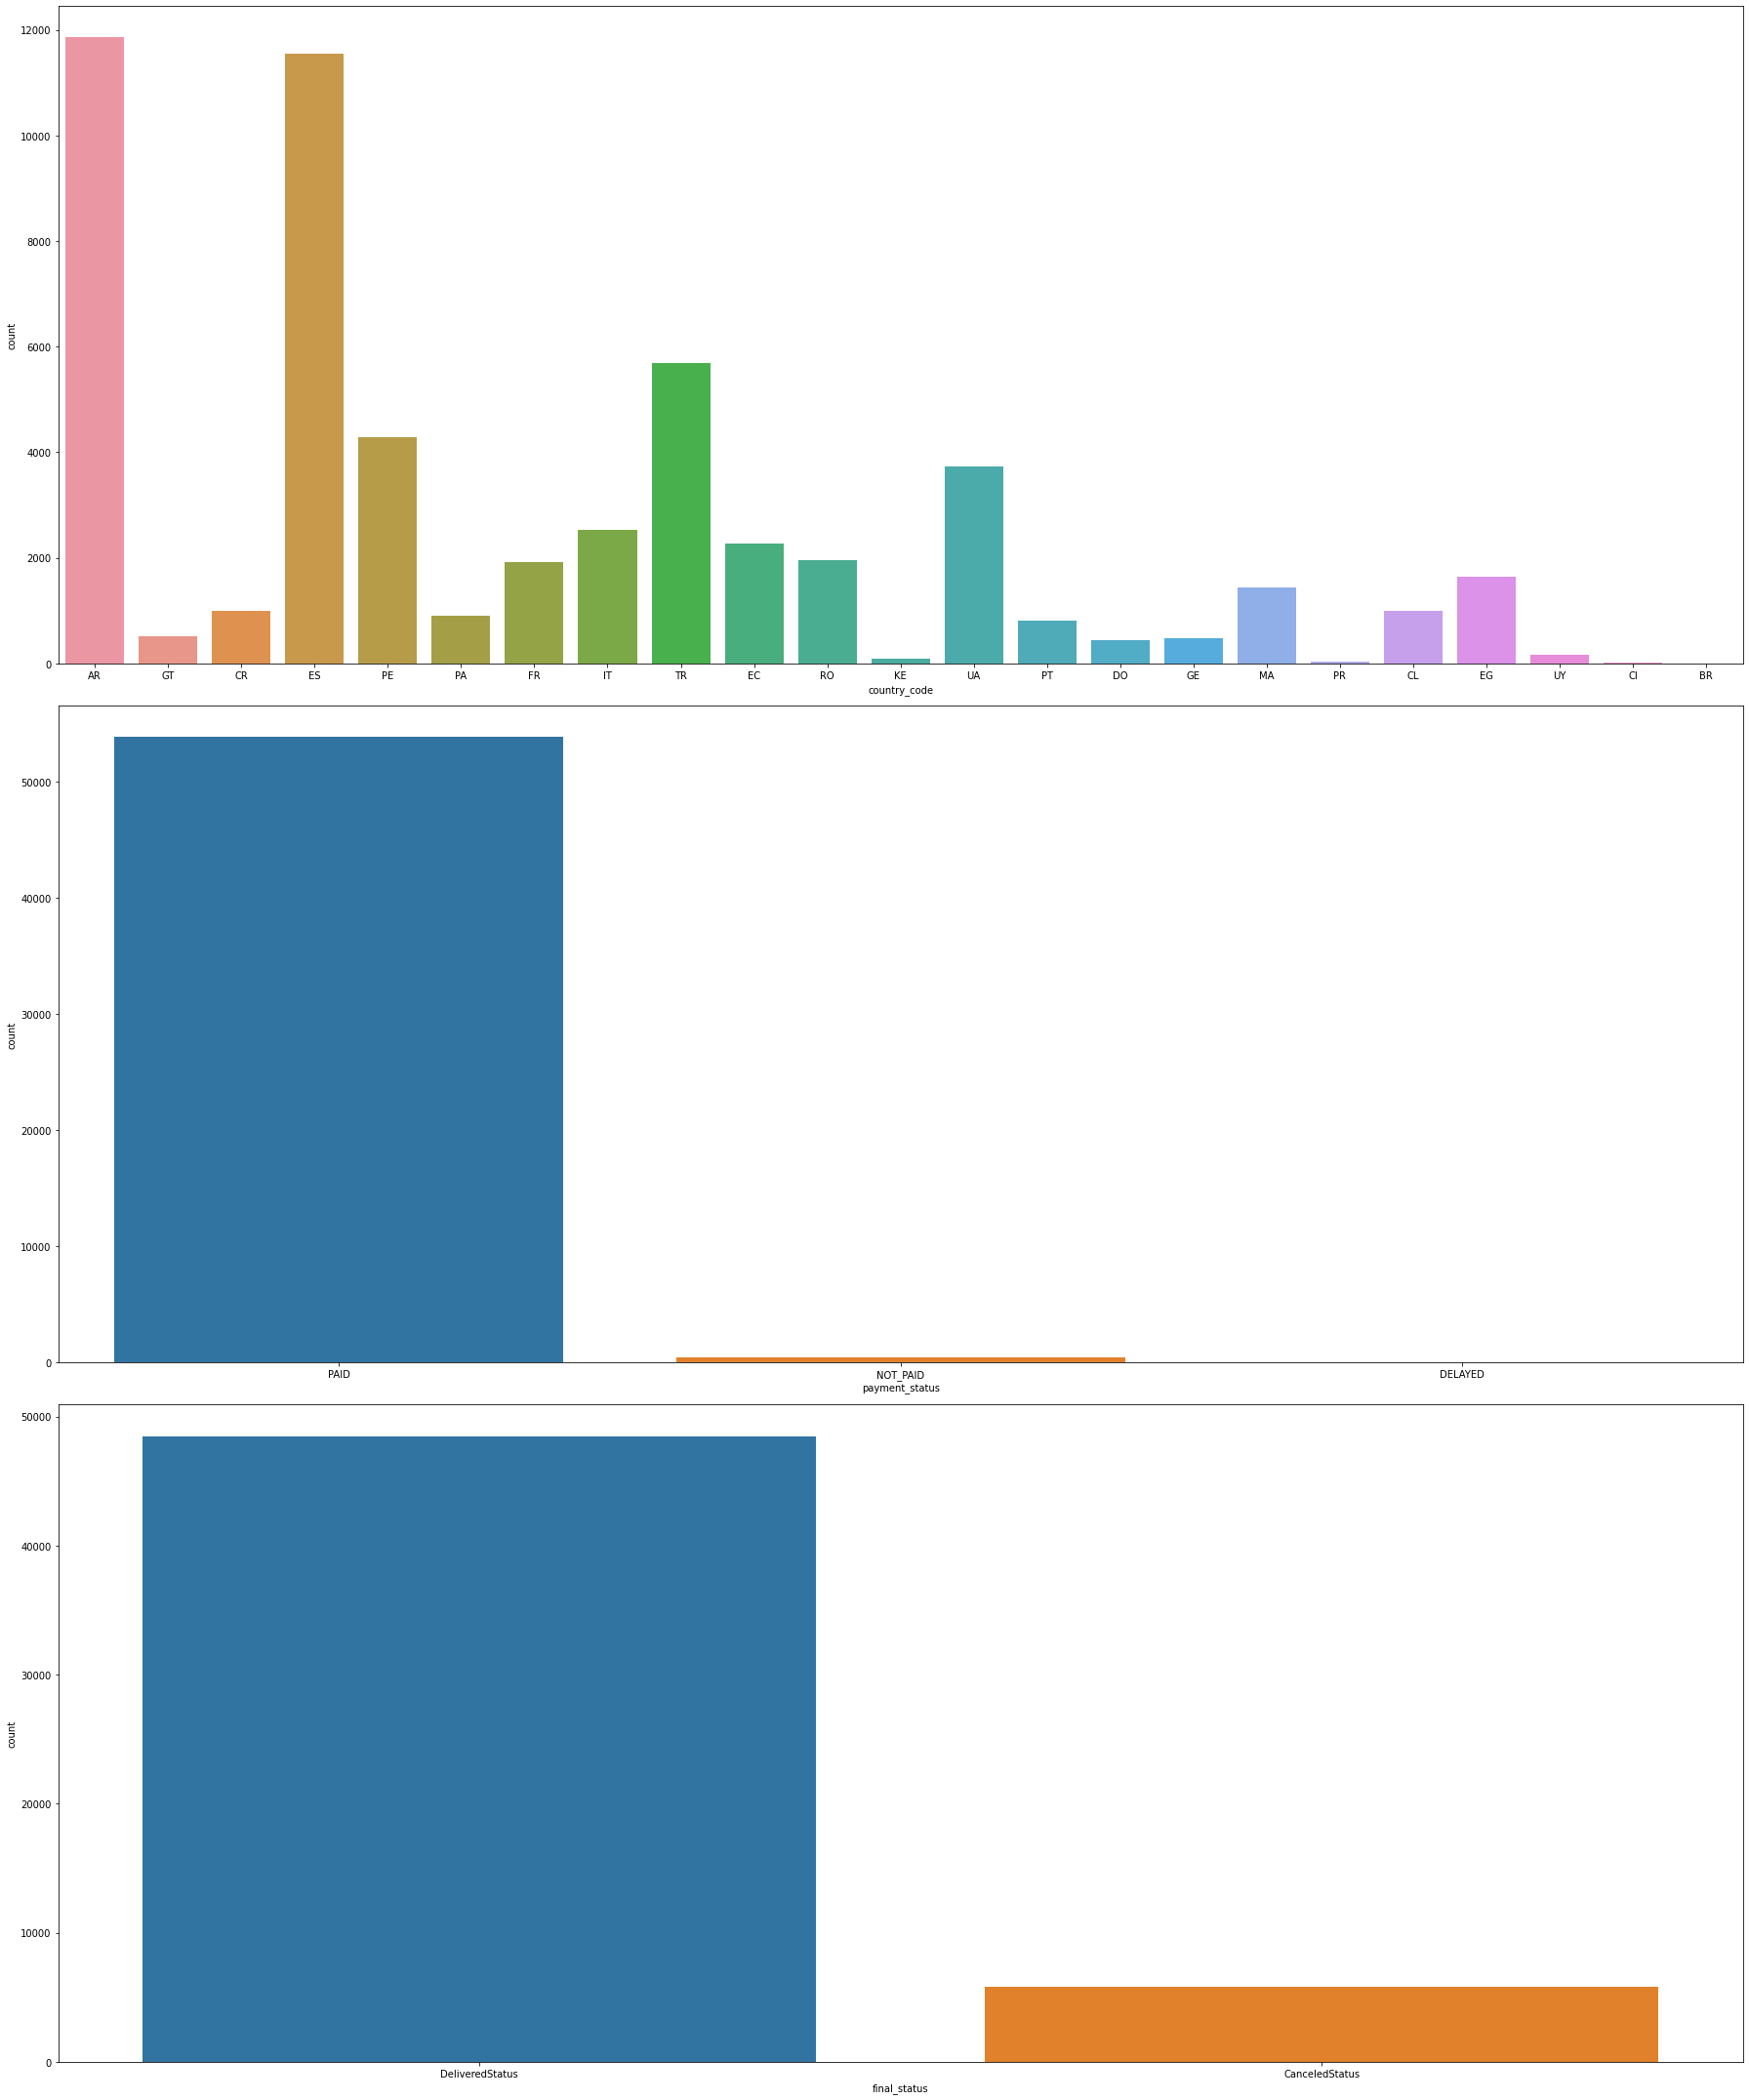

In [11]:
# Let's see how the categorical variables are distributed

cols = df.select_dtypes(include=['object', 'category']).drop(['order_id', 'local_time', 'store_address'], axis=1).columns

fig, axes = plt.subplots(3, 1, figsize= (25, 30))
axes = axes.flat

for index, column in enumerate(cols):
    sns.countplot(x = df[column], data = df, ax=axes[index]);

plt.tight_layout()

plt.show() 

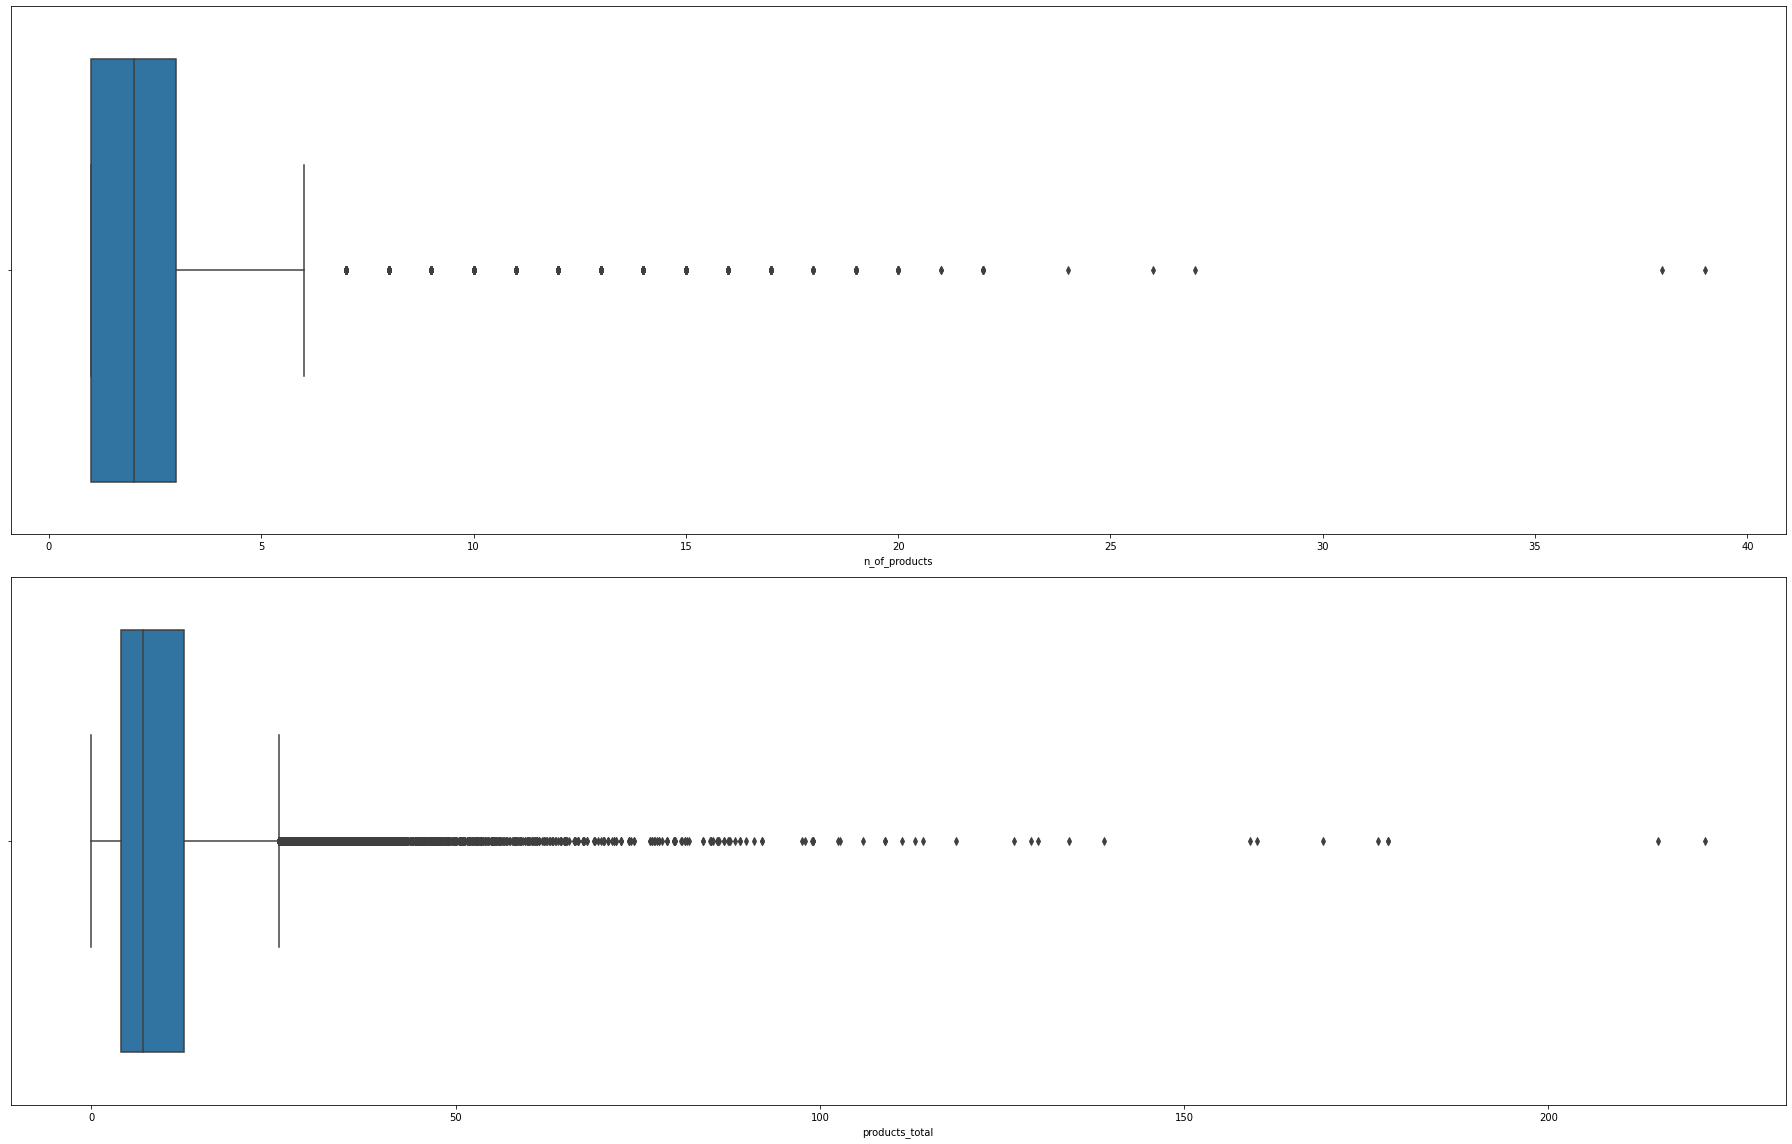

In [12]:
# Let's see what outliers we have

fig, axes = plt.subplots(2, 1)

axes = axes.flat

colsn = df.select_dtypes(include=np.number).columns

for index, column in enumerate(colsn):
    sns.boxplot(x = df[column], data = df, ax=axes[index]);

plt.tight_layout()

plt.show() 

> * As we can see with these boxplots, the majority of the orders are of two products of under €20 in total.
> * Outliers are not really outliers, as we can see there are many who step out of the crowd
> * Knowing this, we could potentially divide our dataset and model it differently for those who have different behaviors, or use RobustScaler to standardize our variables with the least impact from the outliers.
> * Another option is to continue as if we don't have outliers, and try standardizing and not standardizing the numeric variables.

### The next step would be to balance the variable we want to predict, but we will keep that as an option and try different models